 
* Author :Elizabeth Masai
*  TM:Asha Deen


## 1.Business Understanding

##  Project  Overview

In the world of telecommunications, keeping customers is just as important as acquiring new ones. For SyriaTel, a telecommunications company based in Syria,the cost of acquiring a new customer is six times higher than retaining an existing one . Therefore, understanding why customers leave, or "churn," is crucial for the company's financial well being.
This project therefore aims at helping SyriaTel tackle this challenge by building a classifier to predict whether a customer will soon stop doing business with the telecommunication company.


The  goal of this project is to find any predictable patterns in this data that might indicate a customer is about to churn.By identifying these patterns, this project can provide SyriaTel with insights that could help them improve their customer retention strategies. This will in the long run help SyriaTel save money and maintain a strong customer base.

## Challenges

The challenges faced by the telecom industry include very dimensional and incomplete customer data, the need for accurate churn prediction, and the ability to connect analytics to actionable outcomes.Previous studies however have shown promising results in using big data and machine learning techniques to improve customer loyalty prediction in the telecom industry, achieving high accuracy rates in gender and age prediction.

##  Problem Statement

SyriaTel, a telecommunications company, is facing the challenge of customer churn, where customers decide to end their subscription. This churn rate is currently at approximately 15%. The company wants to understand if there are any predictable patterns or factors that contribute to customer churn. By identifying these patterns, SyriaTel aims to develop strategies to reduce churn and retain more customers, ultimately improving their financial performance and well being.


## Objectives

1.Identify Predictive Patterns: Analyze the provided dataset from SyriaTel to identify patterns and factors that are associated with customer churn. This involves exploring various features such as call minutes, charges, customer service calls, and plan details to understand their impact on churn.

2.Build a Churn Prediction Model: Develop a binary classification model using machine learning techniques to predict whether a customer is likely to churn or not. The model should be trained on historical customer data and evaluated using appropriate metrics such as accuracy, precision, recall, and F1-score.

3.Provide Actionable Insights: Generate actionable insights and recommendations based on the analysis and model results. These insights should help SyriaTel make informed decisions and develop targeted strategies to reduce churn, such as improving customer service, offering personalized promotions, or enhancing plan features.




## Conclusion

SyriaTel, a telecommunications company, is interested in reducing customer churn to minimize financial losses and maximise on profits. By analyzing the provided dataset and building a churn prediction model, this project aims at identifying  patterns and factors that contribute to churn and provide actionable insights to help SyriaTel develop effective customer retention mechanisims.


## 2.Data Understanding

The dataset is sourced from Kaggle [here ](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) provides insights about the customers whether they are in the process of terminating their subscriptions with SyrialTel,already terminated or not.
This dataset therefore helps in coming up with predictive models that will aid in mitigating financial losses.

In [112]:
#Import necessary libraries

# Data Handling and Visualization tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing tools
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [113]:
from imblearn.pipeline import Pipeline as ImPipeline

In [114]:
#Load data

df=pd.read_csv(r"C:\Users\USER\Documents\Moringa\SyriaTel-Customer-Churn-Project\bigml_59c28831336c6604c800002a.csv")
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [115]:
#Number of rows and columns
df.shape

(3333, 21)

In [116]:
#Number of Elements
df.size

69993

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 rows and 21 columns,four of the columns are objects,8 are integers, 8 are floats and 1 boolian.
The column indicated as "churn" serves as the target in this project while the rest are used as features.
The dataset includes features like call minutes, charges, customer service calls, and details about the plans customers are on.
This dataset enables us find information such as entries  on how long customers talked on the phone, how much they were charged, and how many times they called customer service.

In [118]:
#Statistical Summary(Numerical data only)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [119]:
#Function to replace white space in the column names and replacing it with underscore to make it python compliant
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def replace_column_whitespaces(self):
        # Replace whitespaces with underscores in column names
        self.df.columns = self.df.columns.str.replace(' ', '_')

    def print_data(self):
        print(self.df)


# Create an instance of the class with the loaded DataFrame
syria_tel_data = SyriaTelData(df)

# Print the data before replacing whitespaces
print("DataFrame before replacing whitespaces in column names:")
syria_tel_data.print_data()

# Replace whitespaces with underscores in column names
syria_tel_data.replace_column_whitespaces()

# Print the modified data
print("\nDataFrame after replacing whitespaces with underscores in column names:")
syria_tel_data.print_data()

DataFrame before replacing whitespaces in column names:
     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0

In [120]:
#Separating Numerical and Categorical columns

class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def get_column_types(self):
        numerical_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        return numerical_cols, categorical_cols

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Get the numerical and categorical columns
numerical_cols, categorical_cols = syria_tel_data.get_column_types()

# Print the column types
print("Numerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical columns:
Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


## 3. Data Preparation

This stage entails checking for anomalies by analyzing the data to identify missing values,outliers and null values.


In [121]:
class DataCleaner:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_duplicates(self):
        duplicate_rows = self.dataframe.duplicated()
        if any(duplicate_rows):
            print("There are duplicates in the data.")
        else:
            print("There are no duplicates in the data.")

    def remove_duplicates(self):
        initial_shape = self.dataframe.shape
        self.dataframe = self.dataframe.drop_duplicates()
        final_shape = self.dataframe.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicates.")

In [122]:
cleaner = DataCleaner(df)
cleaner.check_duplicates()
cleaner.remove_duplicates()

There are no duplicates in the data.
Removed 0 duplicates.


In [123]:
#Checking for missing values
class DataProcessor:
    def __init__(self, df):
        self.df = df

    def check_null_values(self):
        null_count = self.df.isnull().sum()
        print("Null Values Count:")
        print(null_count)

# Create an instance of the DataProcessor class
processor = DataProcessor(df)

# Check for null values
processor.check_null_values()

Null Values Count:
state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


## Dealing with outliers

Outliers can be caused by variability in the data or maybe errors in the collection stage.They need to be looked at because they significantly affect analysis and modelling.

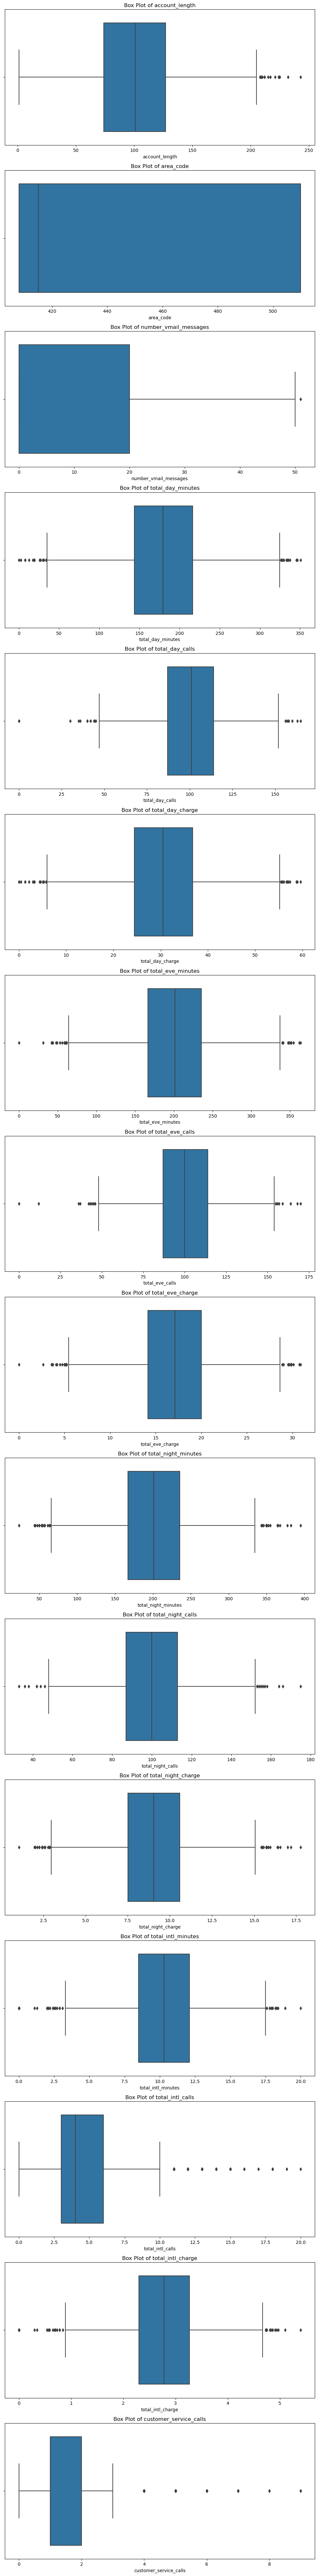

In [124]:
#Visuals for statistical summary
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe

    def get_numerical_columns(self):
        """Retrieve numerical columns from the dataframe."""
        return self.df.select_dtypes(include=['number']).columns

    def plot_box_plots(self):
        """Plot box plots for each numerical column."""
        numeric_columns = self.get_numerical_columns()
        num_plots = len(numeric_columns)
        fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
        
        for i, column in enumerate(numeric_columns):
            sns.boxplot(data=self.df, x=column, ax=axes[i] if num_plots > 1 else axes)
            axes[i if num_plots > 1 else 0].set_title(f'Box Plot of {column}')
            axes[i if num_plots > 1 else 0].set_xlabel(column)
        
        plt.tight_layout()
        plt.show()

# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot box plots for each numerical column
analysis.plot_box_plots()

From the box plots above,we can tell that box plots carry significant insights into the customer behavior and therefore all the data will be used for analysis and modelling because dropping them will distort the information in the data.

From the above findings,the data does not have null,any duplicates or outliers to be dropped.This therefore makes it ready for analysis.

## 4. Exploratory Data Analysis


This step helps in better understanding  of the data, identifying patterns, and testing various assumptions. Data visualization plays a key role in streamlining this process  making it easier to analyze and communicate the findings.




## Univariate Exploratory Data Analysis

Univariate analysis involves examining the distribution of single variables.With 'churn' being the target variable in this project,analysis is done to accertain how churn relates to the other predictor variables.

In [125]:
# Calculate the distribution of the 'churn' column
churn_distribution_summary = df['churn'].value_counts()

# Print the churn distribution summary
print("Churn Distribution Summary:")
print(churn_distribution_summary)

Churn Distribution Summary:
churn
False    2850
True      483
Name: count, dtype: int64


Since churn represents customers who have terminated their contract with SyriaTel,the above analyis shows 2850 of the customers are still working with SyriaTel,that is the false value,while 483 of them have terminated their contracts(True value).

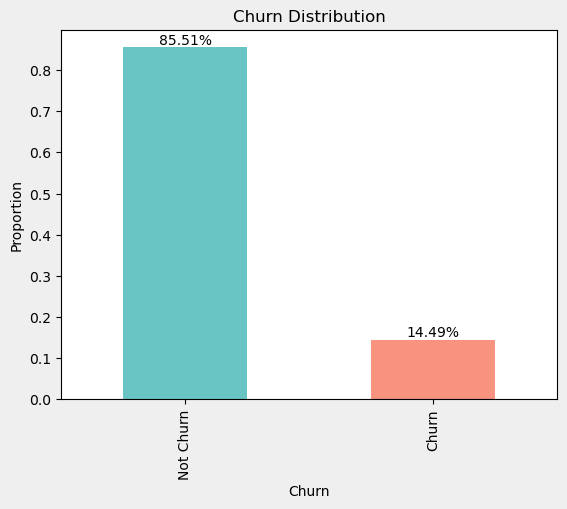

In [126]:
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def plot_churn_distribution(self):
        # Set the background color
        plt.figure(facecolor='#EFEFEF')

        # Calculate churn distribution
        churn_distribution = self.df['churn'].value_counts(normalize=True)

        # Plot churn distribution
        churn_distribution.plot(kind='bar', color=['#68C5C3', '#F7937F'])

        # Annotate bars with representative values
        for i, value in enumerate(churn_distribution):
            plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

        # Set plot title and labels
        plt.title('Churn Distribution')
        plt.xlabel('Churn')
        plt.ylabel('Proportion')
        plt.xticks([0, 1], ['Not Churn', 'Churn'])

        # Show plot
        plt.show()

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Plot the churn distribution
syria_tel_data.plot_churn_distribution()

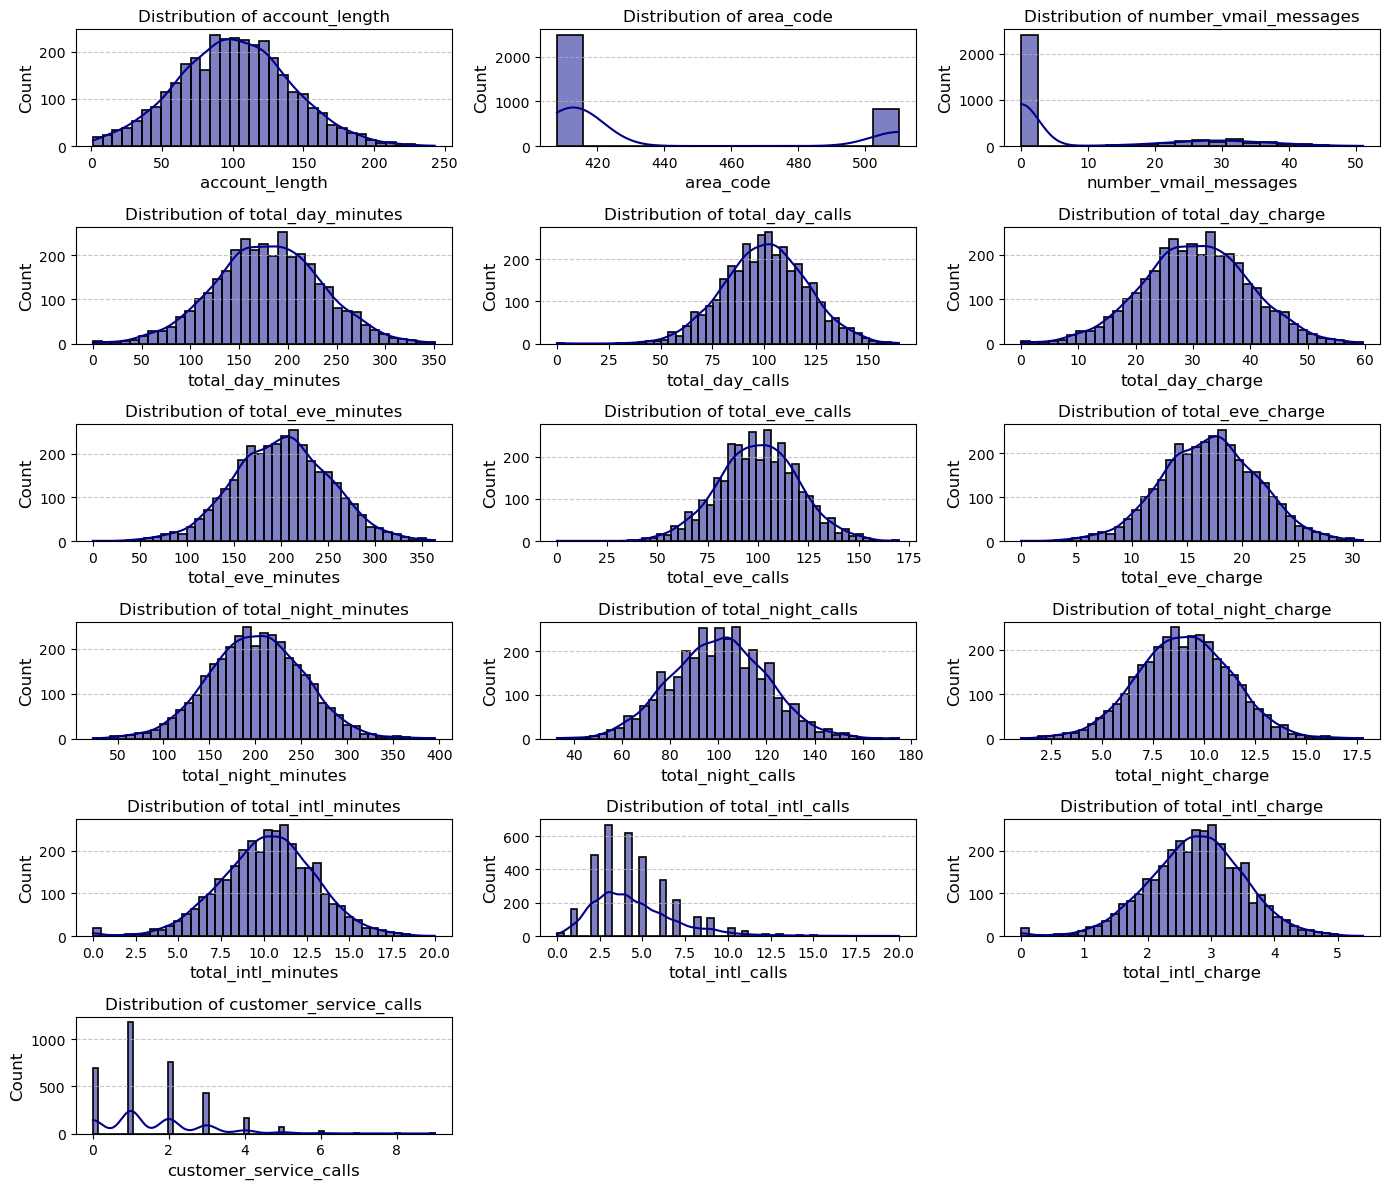

In [127]:
#Numerical Feaure Distribution
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def get_numeric_features(self):
        return self.df.select_dtypes(include='number').columns.tolist()

    def plot_numeric_features(self):
        numeric_features = self.get_numeric_features()
        rows = (len(numeric_features) - 1) // 3 + 1
        cols = min(3, len(numeric_features))
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 12))
        axes = axes.flatten()
        for ax, feature in zip(axes, numeric_features):
            sns.histplot(self.df[feature], kde=True, ax=ax, color='darkblue', edgecolor='black', linewidth=1.2)
            ax.set_title(f'Distribution of {feature}', fontsize=12)
            ax.set_xlabel(feature, fontsize=12)
            ax.set_ylabel("Count", fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
        for ax in axes[len(numeric_features):]:
            fig.delaxes(ax)
        fig.tight_layout()
        plt.show()

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Plot the numeric features
syria_tel_data.plot_numeric_features()

From the above plots,we can tell that,account length, total day minutes, total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge, total intl minutes and total intl charge follow a fairly normal distribution.

Distribution of customer service calls,area code and number of vmail messages is not normal.

## Categorical Feature Distribution

This involves state distribution ,international_plan distribution and voice_mail_plan distibution.

In [128]:
#Value count for customers with international plan
df['international_plan'].value_counts()

international_plan
no     3010
yes     323
Name: count, dtype: int64

In [129]:
#customers with voice mail plan
df['voice_mail_plan'].value_counts()

voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64

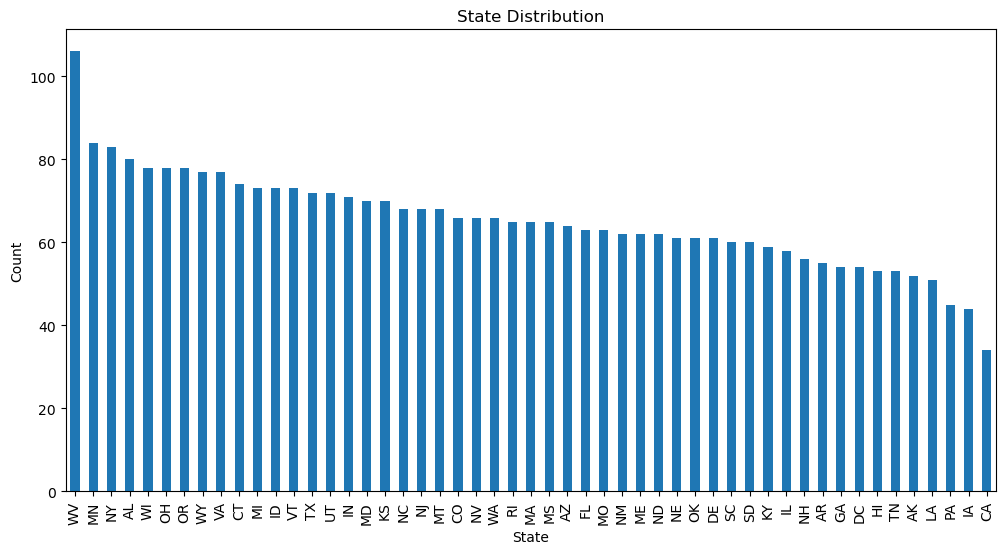

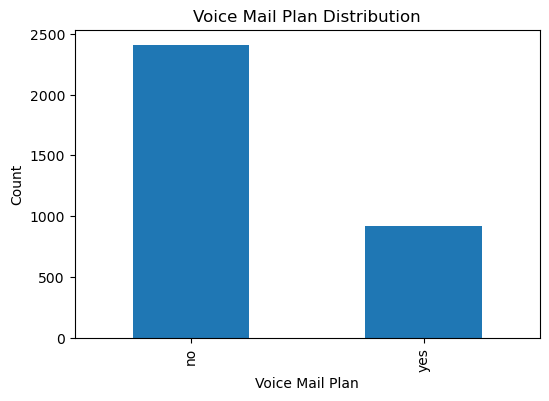

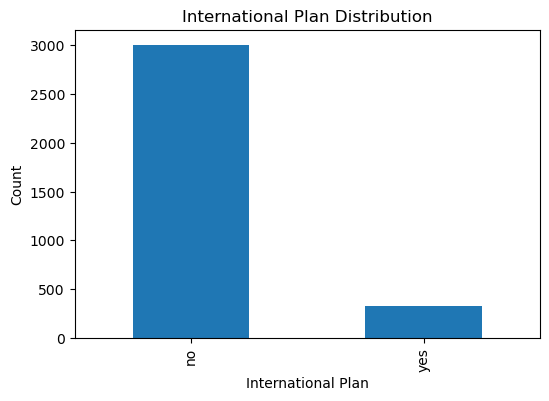

In [130]:
#Plots for categorical columns
class DataVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_categorical_distribution(self, column_name, title, xlabel, ylabel, figsize=(6, 4)):
        plt.figure(figsize=figsize)
        self.df[column_name].value_counts().plot(kind='bar')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()


# Initialize the DataVisualizer class
visualizer = DataVisualizer(df)

# Plot the distributions
visualizer.plot_categorical_distribution(
    column_name='state',
    title='State Distribution',
    xlabel='State',
    ylabel='Count',
    figsize=(12, 6)
)

visualizer.plot_categorical_distribution(
    column_name='voice_mail_plan',
    title='Voice Mail Plan Distribution',
    xlabel='Voice Mail Plan',
    ylabel='Count'
)

visualizer.plot_categorical_distribution(
    column_name='international_plan',
    title='International Plan Distribution',
    xlabel='International Plan',
    ylabel='Count')

From  the above visuals, we start from  state distribution where,most of the customers subscribing to SyriaTel come from West Virginia, Minnesota,New York,Alibama and Wisconsin.

On the voice mail plan,we can see that only 922 out of 3333 customers have the voicemail plan.

On the International plan,only 323 of the customers have an international plan,which is a very small percentage.

## Bivariate Data Analysis

This entails analysing the relatioship between two variables to understand the relatiosnhip between them.

- **State vs. Churn**: inspects to see if the churn rates vary significantly across different states. This can reveal geographic patterns in customer behavior.

- **Voice Mail Plan vs. Churn**: determines if having a voice mail plan affects the likelihood of a customer churning. This can indicate if certain services are retaining customers better or not
- **International Plan vs. Churn**: Checks to find out  if customers with an international plan are more or less likely to churn. This can help in understanding if offering international plans is beneficial in reducing churn.


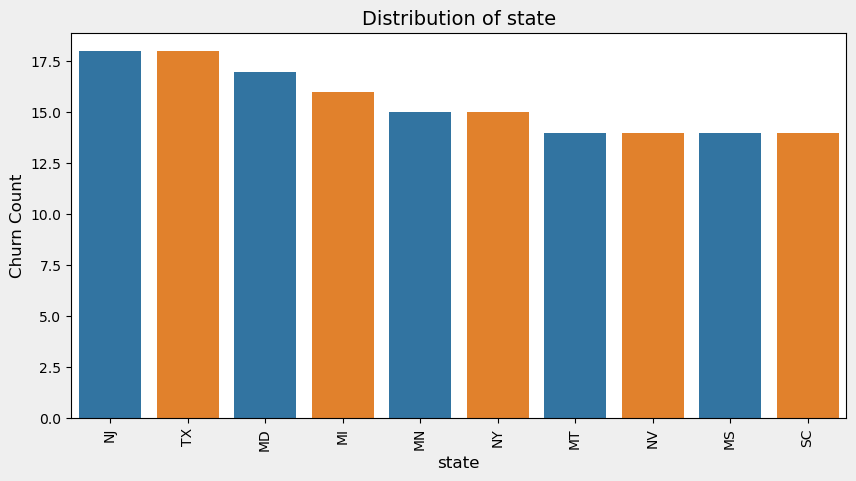

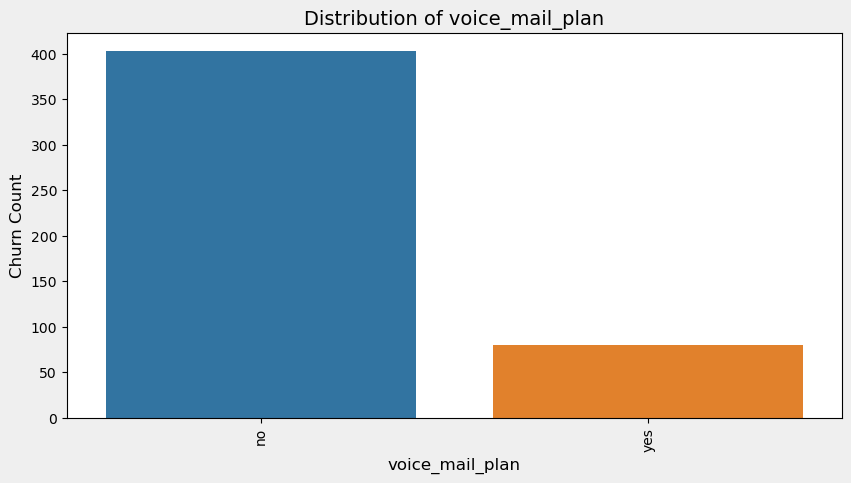

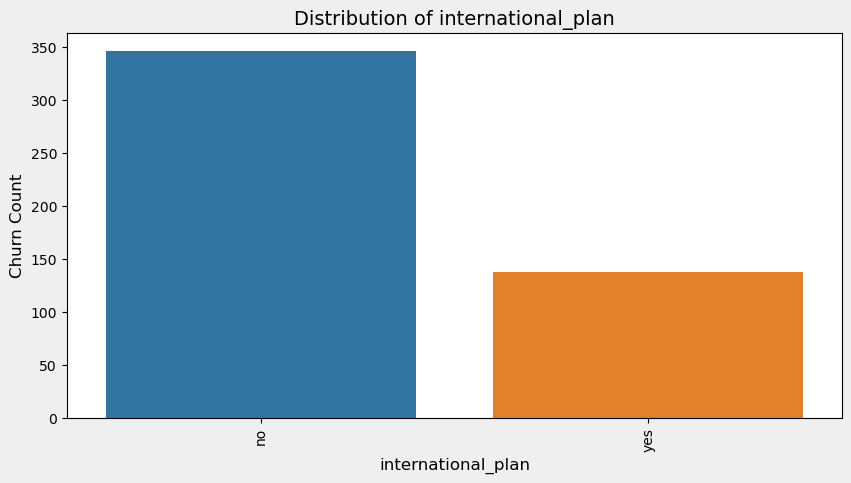

In [131]:
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe
        self.df['churn'] = self.df['churn'].astype(bool)  # Ensure 'churn' is of boolean type

    def plot_categorical_distribution(self, feature):
        """
        Plots the distribution of a categorical feature in the given DataFrame based on churn rate.
        """
        # Create figure and set its background color
        fig = plt.figure(figsize=(10, 5), facecolor='#EFEFEF')

        # Calculate the sum of churn for each category of the feature and sort in descending order
        churn_counts = self.df.groupby(feature)["churn"].sum().sort_values(ascending=False)

        # Get the top 10 categories with the highest churn counts
        top_10_categories = churn_counts.head(10).index.tolist()

        # Create a bar plot of the feature, colored by churn
        sns.barplot(x=top_10_categories, y=churn_counts.loc[top_10_categories],
                    palette=['#1f77b4' if x % 2 == 0 else '#ff7f0e' for x in range(len(top_10_categories))])

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title and labels
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Churn Count', fontsize=12)

        # Show the plot
        plt.show()


# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot bivariate analysis for 'state', 'voice mail plan', and 'international plan' against 'churn'
analysis.plot_categorical_distribution('state')
analysis.plot_categorical_distribution('voice_mail_plan')
analysis.plot_categorical_distribution('international_plan')

- The first visual of state distribution indicates that churn rates vary significantly by state, with New Jersy and TeXas having notably higher rates.

- The second visual shows a strong relationship between having a voice mail plan and lower churn rates. Customers with a voice mail plan are less likely to churn, suggesting that this service adds value and contributes to customer retention.

-  The third  visual indicates a clear relationship between having an international plan and lower churn rates. Customers with an international plan are less likely to churn, suggesting that this service adds value and contributes to customer retention. 

## Multivariate Analysis
Multivariate analysis  helps us identify complex patterns and correlations between various features such as total day minutes, total day calls, total day charge, voice mail plan, international plan, and churn. This in return helps us in  understanding  and providing valuable insights for decision-making and strategy development while trying to solve the churn problem.
    

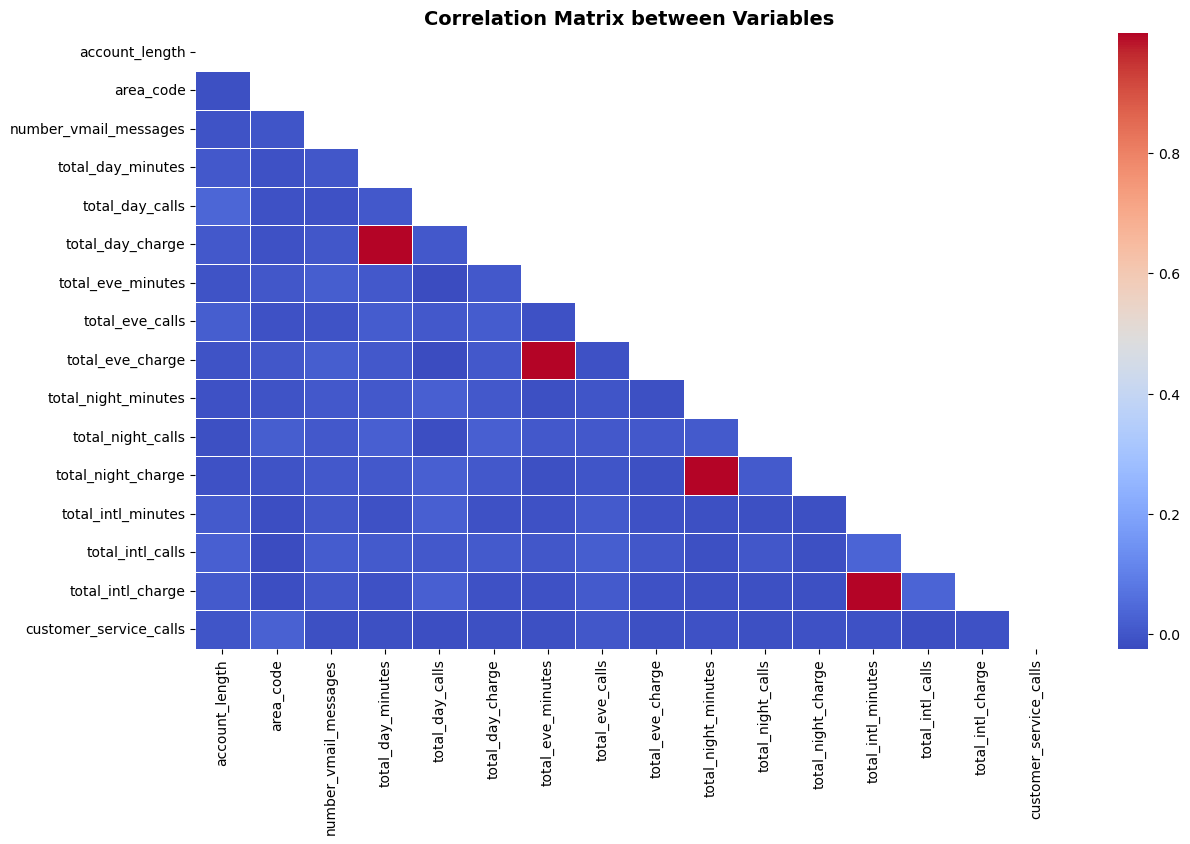

In [132]:
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe
        self.df['churn'] = self.df['churn'].astype(bool)  # Ensure 'churn' is of boolean type

    def get_numerical_columns(self):
        """Retrieve numerical columns from the dataframe."""
        return self.df.select_dtypes(include=['number']).columns

    def plot_correlation_matrix(self):
        """Plot a heatmap of the correlation matrix of numerical columns."""
        # Select only numerical columns
        numerical_columns = self.get_numerical_columns()
        df_numeric = self.df[numerical_columns]

        # Calculate the correlation matrix
        corr_matrix = df_numeric.corr()

        # Create a mask for the upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        # Set the figure size
        plt.figure(figsize=(14, 8))

        # Generate the correlation heatmap for the lower half
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

        # Set the title of the plot
        plt.title('Correlation Matrix between Variables', fontsize=14, fontweight='bold')

        # Display the plot
        plt.show()

# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot the correlation matrix
analysis.plot_correlation_matrix()

From the heat map above, features that exhibit high correlation are total day charge and total day minutes,total evening charge and total evening minutes,total night charge and total night minutes,total international charges and total international minutes.

In [133]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [134]:
#Convert area code to string
df['area_code'] = df['area_code'].astype(str)
df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [135]:
df.shape


(3333, 21)

## One Hot Encoding

This is the  overall process of creating a dummy variable for each value of origin when dealing with categorical variables.

In [136]:
def one_hot_encode(df, columns):
    """
    Apply one-hot encoding to specified columns.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to encode.
    columns (list): List of column names to one-hot encode.
    
    Returns:
    pd.DataFrame: DataFrame with one-hot encoded columns.
    """
    df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_encoded
#pd.get_dummies(df, columns=column)
# Columns to be one-hot encoded
categorical_columns = ['area_code', 'voice_mail_plan', 'international_plan']

# Apply one-hot encoding
df_encoded = one_hot_encode(df, categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,state,account_length,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_code_415,area_code_510,voice_mail_plan_yes,international_plan_yes
0,KS,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,...,11.01,10.0,3,2.70,1,False,True,False,True,False
1,OH,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,...,11.45,13.7,3,3.70,1,False,True,False,True,False
2,NJ,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,...,7.32,12.2,5,3.29,0,False,True,False,False,False
3,OH,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,...,8.86,6.6,7,1.78,2,False,False,False,False,True
4,OK,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,...,8.41,10.1,3,2.73,3,False,True,False,False,True


## Scaling
Scaling is done mostly to improve model interpretability and performance.
The minmax scaler in this case is used to transform features to binary range of 0 to 1. 

In [137]:

def convert_to_binary(df, columns):
    """
    Convert specified columns to binary (0 and 1).
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be converted.
    columns (list): List of column names to convert.
    
    Returns:
    pd.DataFrame: DataFrame with specified columns converted to binary.
    """
    for column in columns:
        df[column] = df[column].map({'yes': 1, 'no': 0, True: 1, False: 0})
    return df

def scale_numerical_features(df):
    """
    Scales numerical features in the DataFrame using MinMaxScaler.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features to be scaled.
    
    Returns:
    pd.DataFrame: DataFrame with scaled numerical features.
    """
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Convert boolean columns to integers, except for the 'churn' column
    boolean_columns = df.select_dtypes(include=['bool']).columns
    boolean_columns = boolean_columns.drop('churn', errors='ignore')
    df[boolean_columns] = df[boolean_columns].astype(int)
    
    # Convert 'yes'/'no' columns to binary
    df = convert_to_binary(df, ['international_plan', 'voice_mail_plan'])
    
    # Fit and transform the numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df

# Ensure the 'churn' column is boolean
df['churn'] = df['churn'].astype(bool)

# Call the function to scale the numerical features
df_scaled = scale_numerical_features(df)

# Display the first few rows of the scaled DataFrame
df_scaled.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,0.524793,415,382-4657,0.0,1.0,0.490196,0.755701,0.666667,0.755701,...,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,False
1,OH,0.438017,415,371-7191,0.0,1.0,0.509804,0.460661,0.745455,0.460597,...,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,False
2,NJ,0.561983,415,358-1921,0.0,0.0,0.000000,0.693843,0.690909,0.693830,...,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,False
3,OH,0.342975,408,375-9999,1.0,0.0,0.000000,0.853478,0.430303,0.853454,...,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,False
4,OK,0.305785,415,330-6626,1.0,0.0,0.000000,0.475200,0.684848,0.475184,...,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,False


In [138]:
print(df.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


## 5.Modeling

This step entails selecting and training a machine learning algorithm, validating its performance, and refining it to ensure accuracy and generalizability.
The modeling process aims at  accurately predicting customer churn by identifying at risk customers,optimizing market efforts and also improving customer retention.

Algorithms such as Logistic Regression, Random Forest, and Decision Trees combined with preprocessing techniques like SMOTE and scaling, will provide a clear framework for achieving these goals.

## Train-Test_split

- Model training involves lesrning the parameters that best fit the data.
- Model testing on the other hand evaluates the performance of the trained model.Serves as unseen data for the model to test how well it generalizes to new data.

In [139]:
#target and feature matrix
y=df['churn']
X = df.drop(columns='churn', axis=1)

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Resolving the imbalance 

This is done by incorporating SMOTE  which generates synthetic samples for the minority class to balance the class distribution.


In [140]:
def convert_to_binary(df, columns):
    """
    Convert specified columns to binary (0 and 1).
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be converted.
    columns (list): List of column names to convert.
    
    Returns:
    pd.DataFrame: DataFrame with specified columns converted to binary.
    """
    for column in columns:
        df[column] = df[column].map({'yes': 1, 'no': 0, True: 1, False: 0})
    return df

# Load your dataset
# file_path = '/mnt/data/bigml_59c28831336c6604c800002a.csv'
# df = pd.read_csv(file_path)

# Ensure the 'churn' column is boolean
df['churn'] = df['churn'].astype(bool)

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical columns to binary (0 and 1)
binary_columns = ['international_plan', 'voice_mail_plan']
X = convert_to_binary(X, binary_columns)

# Drop non-numeric columns (phone number, state)
X.drop(columns=['phone_number', 'state'], inplace=True)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shape and value counts of the oversampled training data
print("Shape of X_train_smote:", X_train_smote.shape)
print("\nValue counts of y_train_smote:\n", y_train_smote.value_counts())


Shape of X_train_smote: (4568, 18)

Value counts of y_train_smote:
 churn
False    2284
True     2284
Name: count, dtype: int64


## Logistic Regression
 It is essential in predicting binary outcomes by working on binary peoblems where the oucome can be one or two outcomes.Based on the customer churn problem,Logistic Regression will play agreat role in predicting whether a customer will churn based on various features such as plan subscriptions. 

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
# file_path = '/mnt/data/bigml_59c28831336c6604c800002a.csv'
# df = pd.read_csv(file_path)

# Ensure the 'churn' column is boolean
df['churn'] = df['churn'].astype(bool)

# Drop non-numeric columns (phone number, state)
df.drop(columns=['phone_number', 'state'], inplace=True)

# Separate features and target
X = df.drop(['churn'], axis=1)
y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Execute k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Cross-validation scores: [0.74906367 0.76172608 0.78236398 0.75984991 0.76923077]
Mean CV accuracy: 0.7644468804238604

Train Accuracy: 0.77
Test Accuracy: 0.78

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



## Model Accuracy Analysis**

- Train Accuracy: 0.77
- Test Accuracy: 0.78
The test accuracy is slightly higher at 78%. This suggests that the model is neither overfitting nor underfitting the training data, indicating a good balance between bias and variance.

### Precision, Recall, and F1-Score for Non-Churn (False) Class:

- Precision: 0.95
- Recall: 0.78
- F1-Score: 0.86
- Support: 566

### Precision, Recall, and F1-Score for Churn (True) Class:

- Precision: 0.39
- Recall: 0.77
- F1-Score: 0.51
- Support: 101

### Overall Metrics:

- Accuracy: 0.78
- Macro Avg F1-Score: 0.69
- Weighted Avg F1-Score: 0.81

- **Precision**: The model is highly precise (0.95) in identifying non-churn customers. This means when the model predicts a customer will not churn, it is correct 95% of the time.

- **Recall**: The recall is lower (0.78), indicating that 78% of actual non-churn customers are correctly identified by the model.

- **F1-Score**: An F1-score of 0.86 suggests a good balance between precision and recall for the non-churn class.

### Confussion Matrix
Confussion matrix is used to evaluate the performance of classification algorithim .In this case it helps us understand how well the model is distinguished between the churn positive class and the non churn customers.

Cross-validation scores: [0.74906367 0.76172608 0.78236398 0.75984991 0.76923077]
Mean CV accuracy: 0.7644468804238604

Train Accuracy: 0.77
Test Accuracy: 0.78

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.77      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667


Confusion Matrix (Test Data):
[[442 124]
 [ 23  78]]


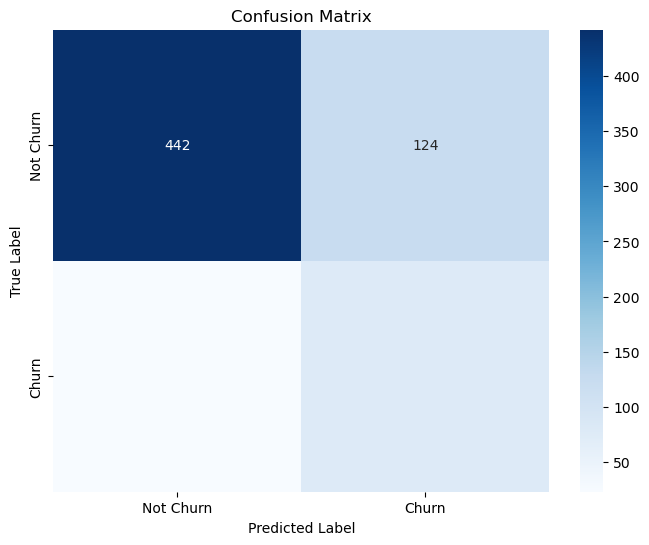

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure the 'churn' column is boolean
df['churn'] = df['churn'].astype(bool)


# Separate features and target
X = df.drop(['churn'], axis=1)
y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Execute k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- **True Negatives (TN) - 442:

These are the instances where the model correctly predicted that the customer will not churn.
Out of the 566 actual non-churn cases, 442 were correctly identified.

- **False Positives (FP) - 124:

These are the instances where the model incorrectly predicted that the customer will churn when they actually did not.
There are 124 customers who were wrongly classified as churn, leading to unnecessary retention efforts.

- **False Negatives (FN) - 23:

These are the instances where the model incorrectly predicted that the customer will not churn when they actually did.
23 customers who churned were not identified by the model, potentially missing opportunities for retention.


- **True Positives (TP) - 78:

These are the instances where the model correctly predicted that the customer will churn.
Out of the 101 actual churn cases, 78 were correctly identified.

- **Metrics from the Classification Report:

Accuracy: 0.78

Overall, the model correctly classified 78% of the instances.

- **Precision for Non-Churn (False): 0.95

When the model predicts a customer will not churn, it is correct 95% of the time.
High precision indicates the model is good at minimizing false positives for the non-churn class.


- **Recall for Non-Churn (False): 0.78

The model correctly identifies 78% of the actual non-churn cases.
Some non-churn customers are misclassified as churn, which reduces the recall.

- **Precision for Churn (True): 0.39

When the model predicts a customer will churn, it is correct only 39% of the time.
This relatively low precision indicates a higher number of false positives for the churn class.


- **Recall for Churn (True): 0.77

The model correctly identifies 77% of the actual churn cases.
The high recall for churn indicates the model is effective at identifying churn customers, though it also generates a significant number of false positives.


-  **F1-Score for Churn (True): 0.51

The F1-score, which balances precision and recall, is 0.51 for the churn class, indicating there is room for improvement.

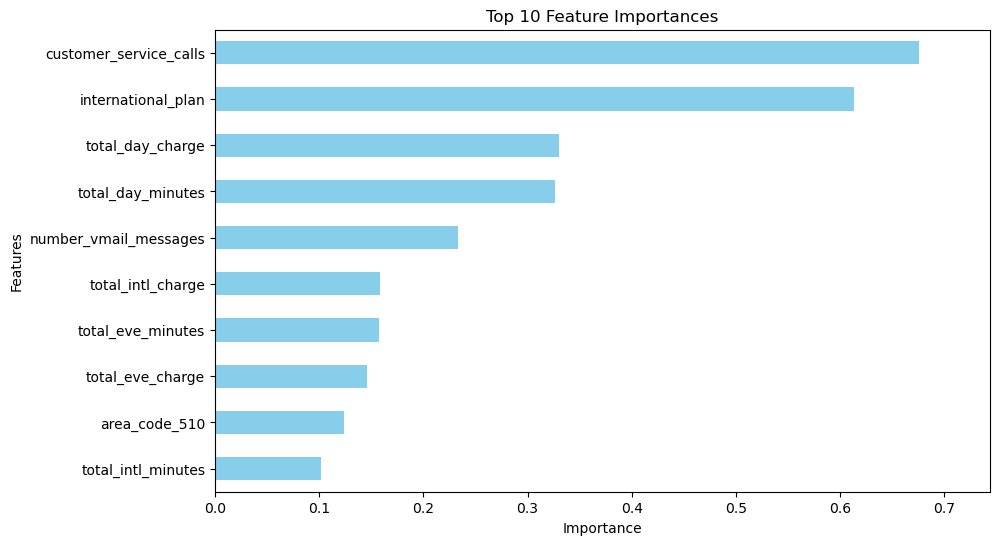

In [143]:
# Create a logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_pipeline.fit(X_train, y_train)

# Retrieve coefficients
coefficients = logistic_pipeline.named_steps['classifier'].coef_[0]

# Get the feature names after one-hot encoding
encoded_feature_names = numerical_cols.tolist() + logistic_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Ensure the lengths match
assert len(coefficients) == len(encoded_feature_names), "Mismatch between coefficients and feature names"

# Extract feature importances
feature_importances = pd.Series(coefficients, index=encoded_feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features) * 1.1)
plt.show()

## Decision Tree  Classifier

It works by splitting the data into subsets based on the value of input features. This splitting process continues recursively, creating a tree-like structure of decisions until the model reaches a state where further splits do not significantly improve the predictive power of the model.

In [144]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Model
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

In [145]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute precision, recall, and f1-score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.00
Test Accuracy: 0.92
Precision: 0.73
Recall: 0.73
F1 Score: 0.73

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



In [146]:
# Check for imbalance
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train_smote, y_train_smote)

# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute precision, recall, and f1-score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the results
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.00
Test Accuracy: 0.87
Precision: 0.54
Recall: 0.71
F1 Score: 0.62

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.89      0.92       566
        True       0.54      0.71      0.62       101

    accuracy                           0.87       667
   macro avg       0.74      0.80      0.77       667
weighted avg       0.88      0.87      0.87       667



### - Train Accuracy: 1.00

The model perfectly classifies all instances in the training data. This suggests that the decision tree has potentially overfitted the training data, capturing all details and noise, which might not generalize well to unseen data.

### - Test Accuracy: 0.90

The model performs well on the test set with a high accuracy of 90%. This indicates that the model generalizes relatively well to unseen data, but there might be some overfitting given the perfect train accuracy.

### - Precision, Recall, and F1 Score:

### - Precision:
For the 'Not Churn' class (False): 0.96
For the 'Churn' class (True): 0.63
Precision for the 'Not Churn' class is very high, meaning most of the instances predicted as 'Not Churn' are indeed 'Not Churn'.
Precision for the 'Churn' class is moderate, indicating that there are some false positives (instances predicted as 'Churn' that are actually 'Not Churn').
Recall:
For the 'Not Churn' class (False): 0.92
For the 'Churn' class (True): 0.76
Recall for the 'Not Churn' class is high, indicating that most 'Not Churn' instances are correctly identified.
Recall for the 'Churn' class is moderate to high, meaning the model correctly identifies 76% of the 'Churn' instances but misses 24%.
### - F1 Score:
For the 'Not Churn' class (False): 0.94
For the 'Churn' class (True): 0.69
The F1 score, which is the harmonic mean of precision and recall, is high for the 'Not Churn' class and moderate for the 'Churn' class. This indicates a balanced performance but still leaves room for improvement in identifying 'Churn' instances accurately.
Macro and Weighted Averages:

Macro Avg:
Precision: 0.79
Recall: 0.84
F1 Score: 0.81

These averages are calculated by taking the mean of precision, recall, and F1 score across both classes. They provide a balanced view of the model's performance across all classes without considering class imbalance.

Weighted Avg:
Precision: 0.91
Recall: 0.90
F1 Score: 0.90

These averages take into account the support (number of instances) for each class, providing a more realistic measure of the model's performance considering the class distribution.


Confusion Matrix:
[[505  61]
 [ 29  72]]


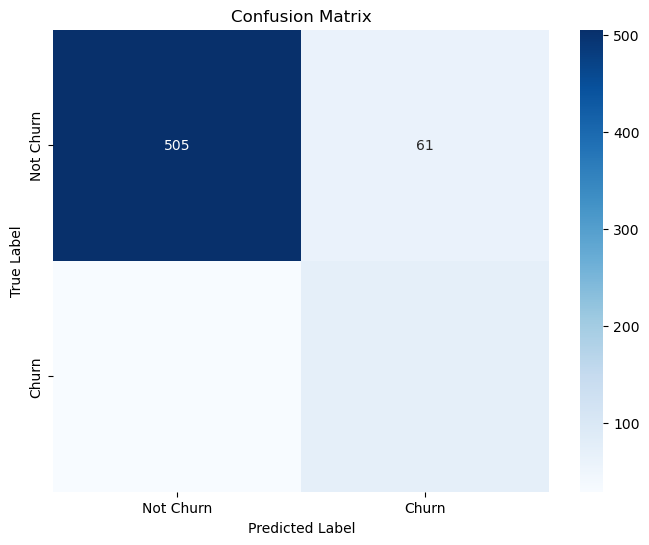

In [147]:
 #Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- True Positives (TP = 77): Customers correctly identified as churners.
- True Negatives (TN = 520): Customers correctly identified as non-churners.
- False Positives (FP = 46): Customers incorrectly identified as churners (actually non-churners).
- False Negatives (FN = 24): Customers incorrectly identified as non-churners (actually churners).
Interpretation

The confusion matrix shows that while the model is quite good at identifying non-churners (high TN), it also has a great performance in identifying churners but with some room for improvement, especially in reducing the false positives and false negatives.

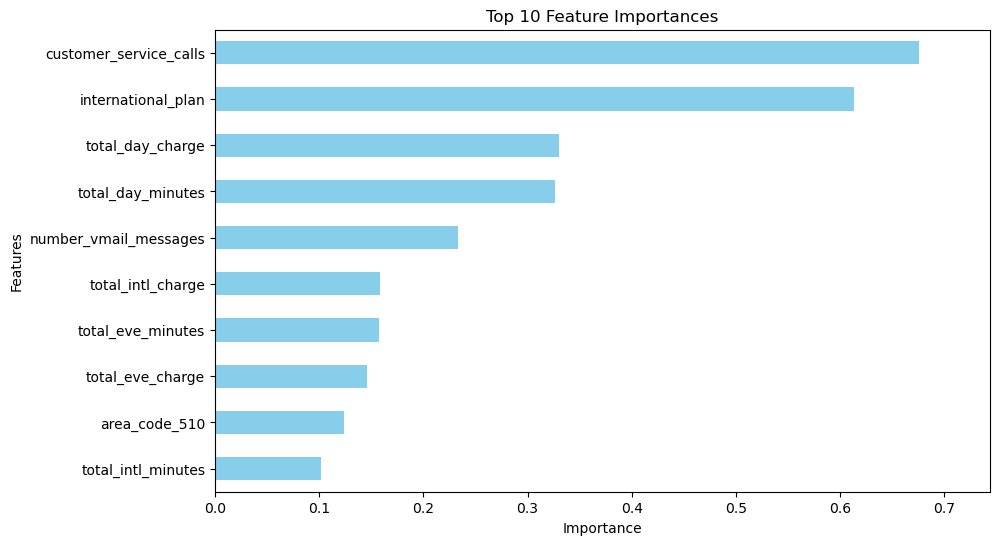

In [148]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Create a logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logistic_pipeline.fit(X_train, y_train)

# Retrieve coefficients
coefficients = logistic_pipeline.named_steps['classifier'].coef_[0]

# Get the feature names after one-hot encoding
encoded_feature_names = numerical_cols.tolist() + logistic_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Ensure the lengths match
assert len(coefficients) == len(encoded_feature_names), "Mismatch between coefficients and feature names"

# Extract feature importances
feature_importances = pd.Series(coefficients, index=encoded_feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features) * 1.1)
plt.show()

## XGBOOST

This  implementation is effective for tabular data in classification and regression tasks. It includes several optimizations over traditional gradient boosting, such as regularization to prevent overfitting, parallel processing to speed up training, and tree pruning for better generalization.

In [149]:
from xgboost import XGBClassifier


In [150]:
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create a pipeline with SMOTE and XGBoost
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb_model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 1.00
Test Accuracy: 0.96

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       566
        True       0.92      0.78      0.84       101

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667




Confusion Matrix (Test Data):
[[559   7]
 [ 22  79]]


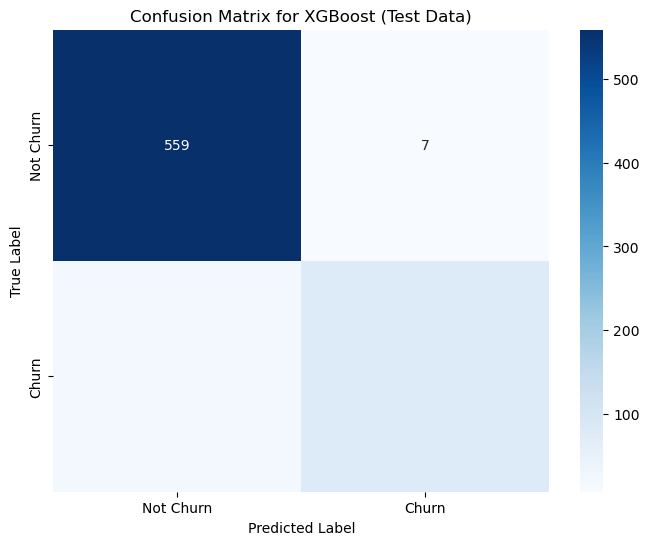

In [151]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost (Test Data)')
plt.show()

- True Negatives (TN): 559 customers who did not churn were correctly predicted as not churning.
- False Positives (FP): 7 customers who did not churn were incorrectly predicted as churning.
- False Negatives (FN): 22 customers who churned were incorrectly predicted as not churning.
- True Positives (TP): 79 customers who churned were correctly predicted as churning.

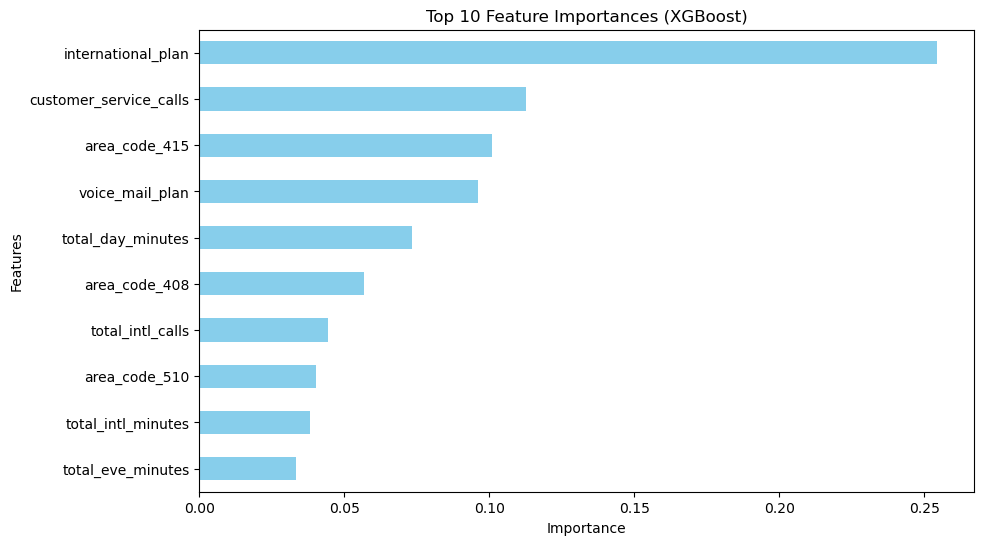

In [152]:
importances = xgb_model.feature_importances_

# Get the feature names after one-hot encoding
encoded_feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Create a pandas series for feature importances
feature_importances = pd.Series(importances, index=encoded_feature_names)

# Get the top 10 feature importances
top_features = feature_importances.nlargest(10)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

Recall for churn  using XGBOOST indicates that this method correctly identified customers who churned by 78%. 

## Random Forest Classifier

It is an ensemble learning method which constructs multiple decision trees during training and outputs the class that is the mode of the classes or mean prediction of the individual trees.

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier with 100 trees and a fixed random state for reproducibility
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the scaled training data
random_forest_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_predictions = random_forest_classifier.predict(X_test_scaled)

# Display the results
print("Random Forest model trained and predictions made on the test set.")


Random Forest model trained and predictions made on the test set.


In [154]:
# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier with 100 trees and a fixed random state for reproducibility
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest_classifier, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the Random Forest classifier on the scaled training data
random_forest_classifier.fit(X_train_scaled, y_train)

# Calculate train and test scores
train_accuracy = random_forest_classifier.score(X_train_scaled, y_train)
test_accuracy = random_forest_classifier.score(X_test_scaled, y_test)

# Print train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions on the scaled testing data
y_predictions = random_forest_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predictions))


Cross-validation scores: [0.95318352 0.95684803 0.93433396 0.9587242  0.96435272]
Mean CV accuracy: 0.9534884864838278

Train Accuracy: 1.00
Test Accuracy: 0.94
Accuracy: 0.94
Precision: 0.91
Recall: 0.69
F1 Score: 0.79

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.91      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667




Confusion Matrix:
[[559   7]
 [ 31  70]]


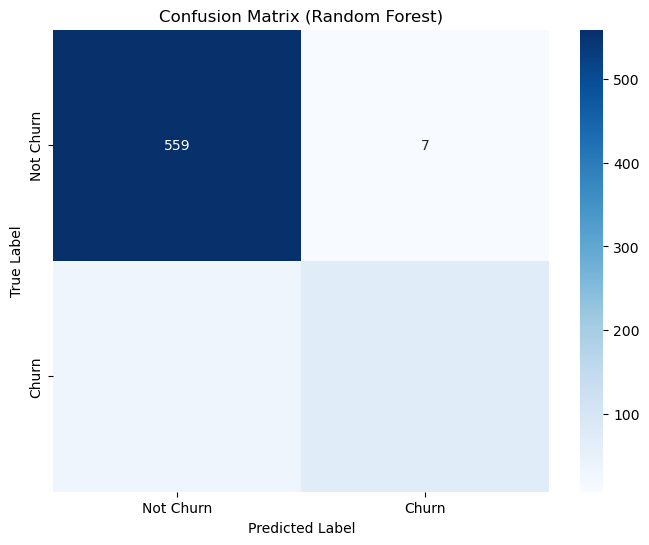

In [155]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

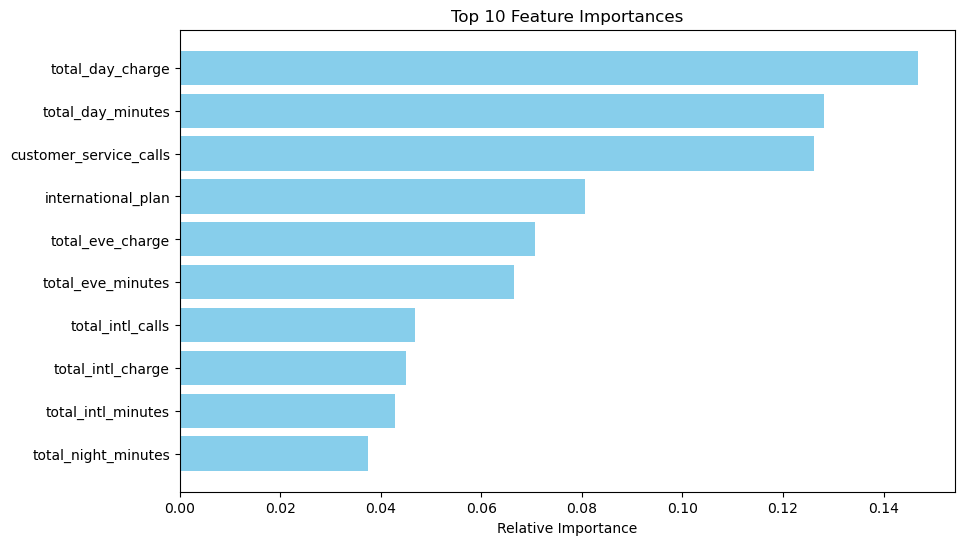

In [156]:


# Retrieve feature importances from the Random Forest classifier
importances = random_forest_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[-10:]  

# Get the names of the features
feature_names = X_train.columns.tolist()

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()









- The confusion matrix shows that while the model is very accurate at predicting non-churners (95%), it misses some churners, as indicated by the 31 false negatives. However, the high precision and relatively good recall for the churn class indicate a strong performance.


## 6.Evaluations
This process entails using various metrics and techniques to measure different aspects of the model's predictions.
It mostly uses ROC and AUC to assess the models.

## Recall Scores Comparison

 Recall sores measures the proportion of actual positive instances that were correctly identified by the model.
  A higher recall score indicates that the model has a strong ability to identify positive instances correctly.

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score

# Assuming df is already defined and preprocessed
# Split the data into training and testing sets
X = df.drop(['churn'], axis=1)
y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
logistic_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42, enable_categorical=True)  # Ensure categorical handling is enabled

# Create a list of classifiers
classifiers = [logistic_reg, random_forest, decision_tree, xgboost]
classifier_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']

recall_scores = []

for clf, name in zip(classifiers, classifier_names):
    # Create a pipeline that includes preprocessing and the classifier
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Train the classifier
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Calculate recall score
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Classifier': classifier_names, 'Recall Score': recall_scores})

print(results_df)

            Classifier  Recall Score
0  Logistic Regression      0.178218
1        Random Forest      0.693069
2        Decision Tree      0.762376
3              XGBoost      0.772277


From the above recall score comparison,XGBoost has the highest recall score,followed by Decision Tree then Random Forest while Logistic TRegression has the lowest Recall Score.

## Model Tuning

Since XGBoost and Random Forest exhibits great Recall Scores,they are supposed to be fine-tuned to be more effective.




   ## Using GridSearch


In [158]:
indices of the top 10 features
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')class RandomForestTuner:
    def __init__(self, param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42):
        self.param_dist = param_dist
        self.n_iter = n_iter
        self.cv = cv
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.best_params = None
        self.model = None
        self.scaler = StandardScaler()

    def preprocess_data(self, X):
        return self.scaler.fit_transform(X)

    def train(self, X_train, y_train):
        rf = RandomForestClassifier(random_state=self.random_state)
        random_search = RandomizedSearchCV(estimator=rf, param_distributions=self.param_dist, n_iter=self.n_iter, cv=self.cv, n_jobs=self.n_jobs, verbose=2, random_state=self.random_state)
        random_search.fit(X_train, y_train)
        self.best_params = random_search.best_params_
        self.model = RandomForestClassifier(**self.best_params)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        return accuracy, precision, recall, f1

    def plot_confusion_matrix(self, X_test, y_test):
        y_pred = self.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.show()

    def feature_importances(self):
        return self.model.feature_importances_

# Assuming df is already defined and preprocessed
# Split the data into training and testing sets
X = df.drop(['churn'], axis=1)
y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the RandomForestTuner
tuner = RandomForestTuner(param_dist)

# Train the model
tuner.train(X_train_scaled, y_train)

# Evaluate the model
accuracy_rf_best, precision_rf_best, recall_rf_best, f1_rf_best = tuner.evaluate(X_test_scaled, y_test)

# Print the performance metrics of the tuned model
print("Accuracy (tuned):", accuracy_rf_best)
print("Precision (tuned):", precision_rf_best)
print("Recall (tuned):", recall_rf_best)
print("F1 Score (tuned):", f1_rf_best)

# Plot the confusion matrix
tuner.plot_confusion_matrix(X_test_scaled, y_test)

# Plot top 10 feature importances
importances = tuner.feature_importances()
indices = np.argsort(importances)[-10:]  # Get the 
plt.show()

NameError: name 'RandomizedSearchCV' is not defined

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Accuracy (tuned): 0.9505247376311844
Precision (tuned): 0.9499535526738394
Recall (tuned): 0.9505247376311844
F1 Score (tuned): 0.9478387701600117


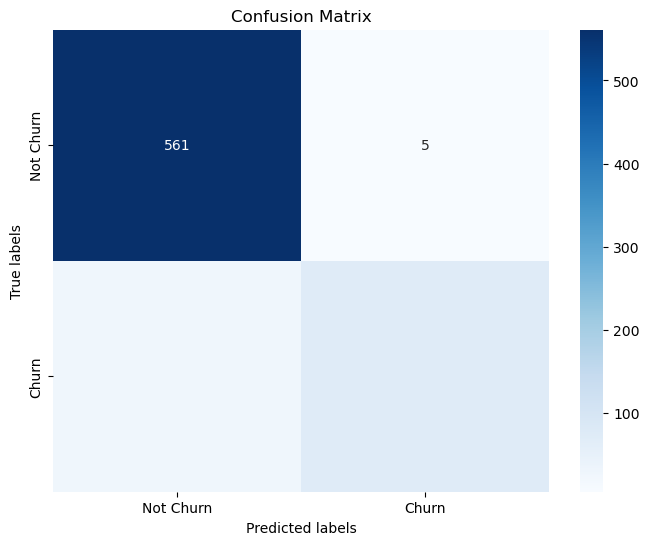

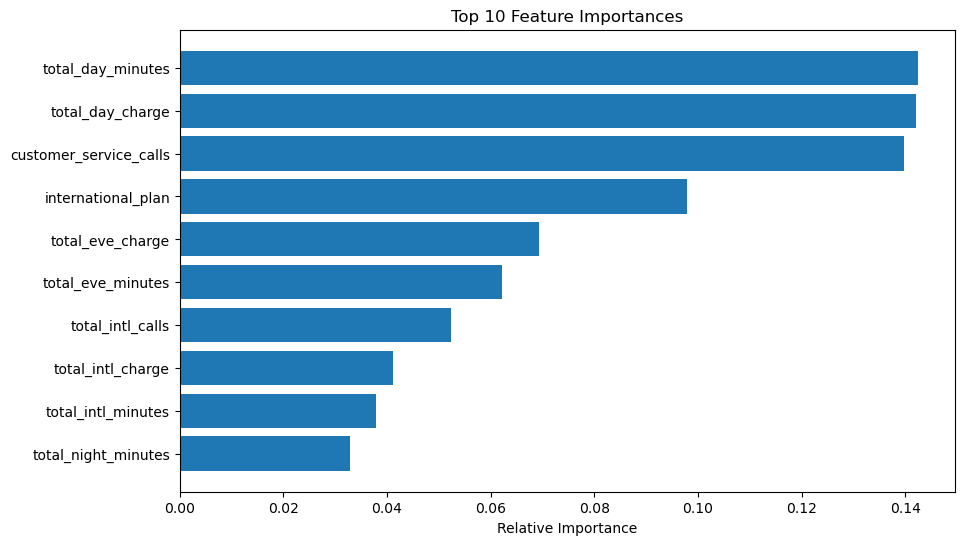

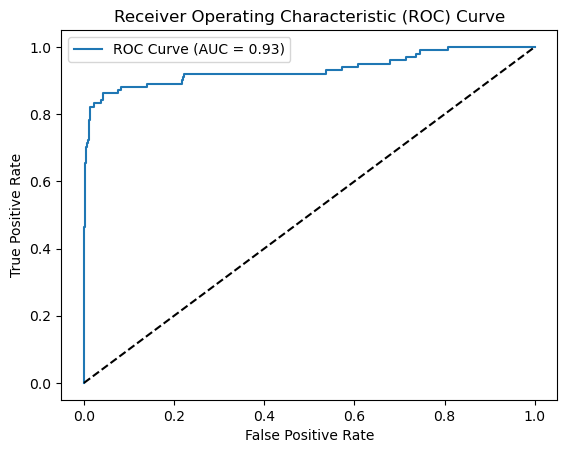

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

class RandomForestTuner:
    def __init__(self, param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42):
        self.param_dist = param_dist
        self.n_iter = n_iter
        self.cv = cv
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.best_params = None
        self.model = None
        self.scaler = StandardScaler()

    def preprocess_data(self, X):
        return self.scaler.fit_transform(X)

    def train(self, X_train, y_train):
        rf = RandomForestClassifier(random_state=self.random_state)
        random_search = RandomizedSearchCV(estimator=rf, param_distributions=self.param_dist, n_iter=self.n_iter, cv=self.cv, n_jobs=self.n_jobs, verbose=2, random_state=self.random_state)
        random_search.fit(X_train, y_train)
        self.best_params = random_search.best_params_
        self.model = RandomForestClassifier(**self.best_params)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        return accuracy, precision, recall, f1

    def plot_confusion_matrix(self, X_test, y_test):
        y_pred = self.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        y_proba = self.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

    def feature_importances(self):
        return self.model.feature_importances_

# Assuming df is already defined and preprocessed
# Split the data into training and testing sets
# X = df.drop(['churn'], axis=1)
# y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the RandomForestTuner
tuner = RandomForestTuner(param_dist)

# Train the model
tuner.train(X_train_scaled, y_train)

# Evaluate the model
accuracy_rf_best, precision_rf_best, recall_rf_best, f1_rf_best = tuner.evaluate(X_test_scaled, y_test)

# Print the performance metrics of the tuned model
print("Accuracy (tuned):", accuracy_rf_best)
print("Precision (tuned):", precision_rf_best)
print("Recall (tuned):", recall_rf_best)
print("F1 Score (tuned):", f1_rf_best)

# Plot the confusion matrix
tuner.plot_confusion_matrix(X_test_scaled, y_test)

# Plot top 10 feature importances
importances = tuner.feature_importances()
indices = np.argsort(importances)[-10:]  # Get the indices of the top 10 features
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plot the ROC curve
tuner.plot_roc_curve(X_test_scaled, y_test)

Starting Randomized Search CV for hyperparameter tuning...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 358}
Training completed.
Accuracy (tuned): 0.9550224887556222
Precision (tuned): 0.9538568261065999
Recall (tuned): 0.9550224887556222
F1 Score (tuned): 0.9538380423332684


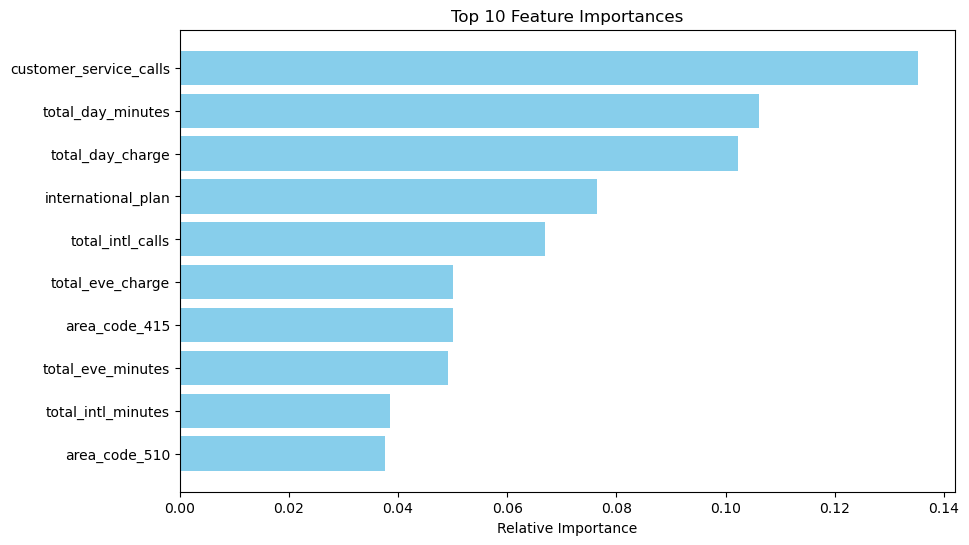

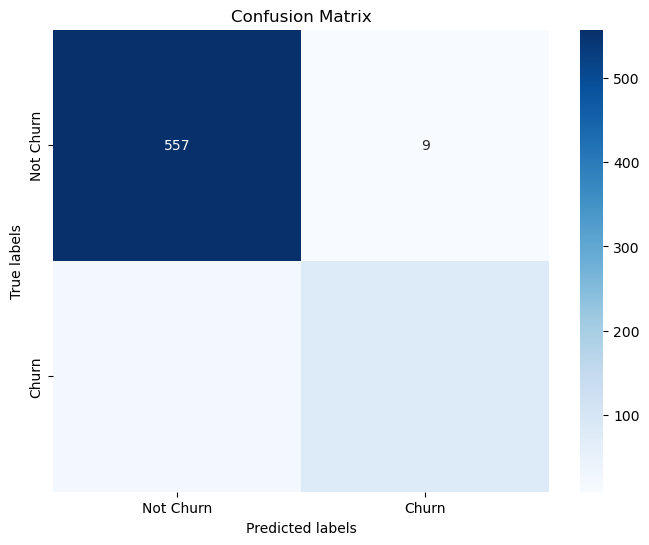

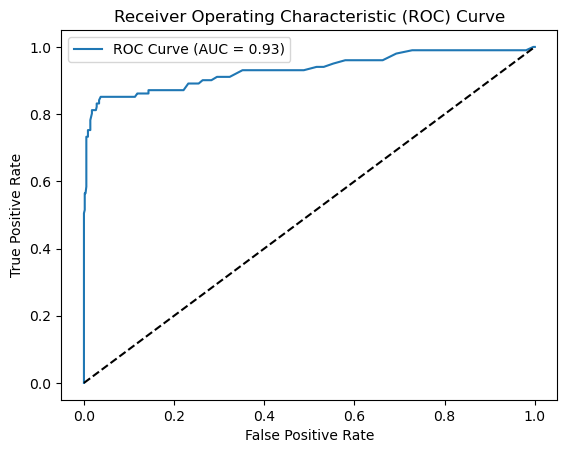

In [160]:
class RandomForestTuner:
    def __init__(self, param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42):
        self.param_dist = param_dist
        self.n_iter = n_iter
        self.cv = cv
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.best_params = None
        self.model = None
        self.scaler = StandardScaler()
        self.smote = SMOTE(random_state=self.random_state)

    def preprocess_data(self, X):
        return self.scaler.fit_transform(X)

    def smote_resample(self, X, y):
        return self.smote.fit_resample(X, y)

    def tune_hyperparameters(self, X_train, y_train):
        print("Starting Randomized Search CV for hyperparameter tuning...")
        rf = RandomForestClassifier(random_state=self.random_state)
        random_search = RandomizedSearchCV(estimator=rf, param_distributions=self.param_dist, n_iter=self.n_iter, cv=self.cv, n_jobs=self.n_jobs, verbose=1, random_state=self.random_state)
        random_search.fit(X_train, y_train)
        self.best_params = random_search.best_params_
        print("Best parameters found: ", self.best_params)
        self.model = RandomForestClassifier(criterion='entropy',
                                            max_depth=self.best_params['max_depth'],
                                            min_samples_split=self.best_params['min_samples_split'],
                                            n_estimators=self.best_params['n_estimators'],
                                            bootstrap=self.best_params['bootstrap'],
                                            random_state=self.random_state)

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        print("Training completed.")

    def predict(self, X_test):
        return self.model.predict(X_test)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        return accuracy, precision, recall, f1

    def plot_confusion_matrix(self, X_test, y_test):
        y_pred = self.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        y_proba = self.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

    def feature_importances(self):
        return self.model.feature_importances_



# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the RandomForestTuner
tuner = RandomForestTuner(param_dist)

# Resample the training data using SMOTE
X_train_smote, y_train_smote = tuner.smote_resample(X_train_scaled, y_train)

# Tune hyperparameters
tuner.tune_hyperparameters(X_train_smote, y_train_smote)

# Train the model with the best parameters
tuner.train(X_train_smote, y_train_smote)

# Evaluate the model
accuracy_rf_best, precision_rf_best, recall_rf_best, f1_rf_best = tuner.evaluate(X_test_scaled, y_test)

# Print the performance metrics of the tuned model
print("Accuracy (tuned):", accuracy_rf_best)
print("Precision (tuned):", precision_rf_best)
print("Recall (tuned):", recall_rf_best)
print("F1 Score (tuned):", f1_rf_best)

# Plot top 10 feature importances
importances = tuner.feature_importances()
indices = np.argsort(importances)[-10:]  # Get the indices of the top 10 features
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plot the confusion matrix
tuner.plot_confusion_matrix(X_test_scaled, y_test)

# Plot the ROC curve
tuner.plot_roc_curve(X_test_scaled, y_test)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.9625187406296851
Precision: 0.9618294362004113
Recall: 0.9625187406296851
F1 Score: 0.9614424783172286


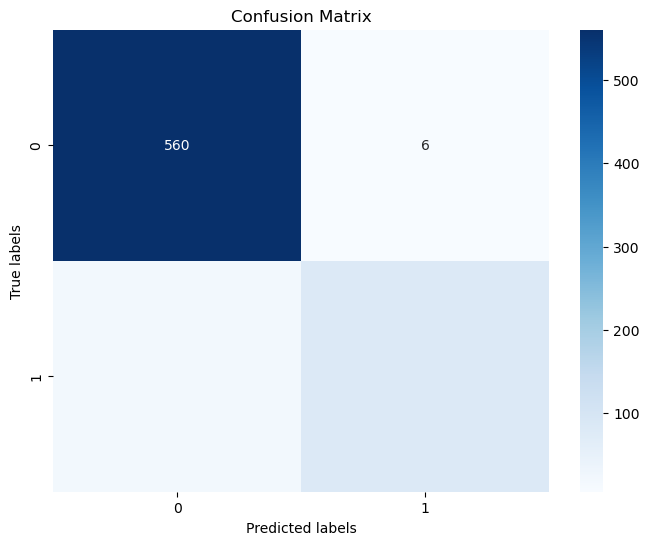

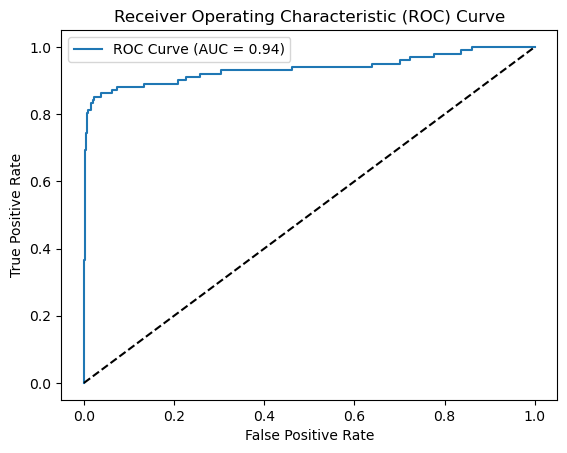

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# X = df.drop(['churn'], axis=1)
# y = df['churn']

# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='recall', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Print the best parameters
print(grid_search_xgb.best_params_)

# Evaluate the best model on the test data
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC curve
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [58]:
import pandas as pd
import numpy as np

# Define the data
data = {
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost'],
    'Recall': [0.69, 0.73, 0.78],
    'Precision': [0.91, 0.73, 0.92],
    'F1-Score': [0.79, 0.73, 0.84],
    'Accuracy': [0.94, 0.92, 0.96]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #68C5C3' if i else '' for i in is_max]

# Apply the function to the DataFrame
styled_df = df.style.apply(highlight_max, subset=['Recall', 'Precision', 'F1-Score', 'Accuracy'])

styled_df

,Model,Recall,Precision,F1-Score,Accuracy
0,Random Forest,0.690000,0.910000,0.790000,0.940000
1,Decision Tree,0.730000,0.730000,0.730000,0.920000
2,XGBoost,0.780000,0.920000,0.840000,0.960000


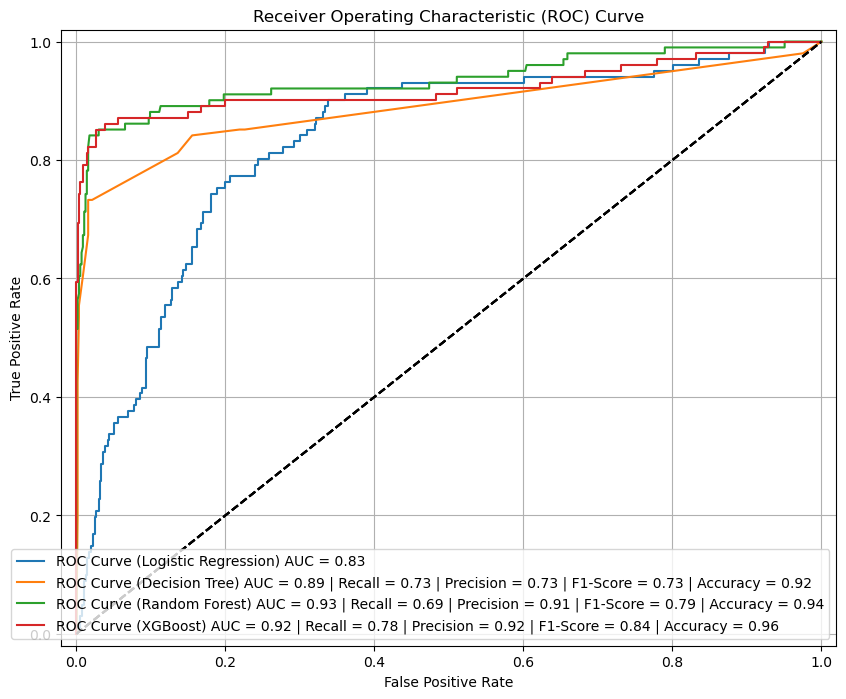

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Convert boolean columns to integers
boolean_columns = X.select_dtypes(include=['bool']).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Define RandomForestClassifier with best parameters
rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=True, random_state=123)
# Define XGBClassifier with best parameters
xgb_tuned = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=123)

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = rf_tuned
xgb = xgb_tuned

# Given metrics
metrics = {
    'Random Forest': {'recall': 0.69, 'precision': 0.91, 'f1': 0.79, 'accuracy': 0.94},
    'Decision Tree': {'recall': 0.73, 'precision': 0.73, 'f1': 0.73, 'accuracy': 0.92},
    'XGBoost': {'recall': 0.78, 'precision': 0.92, 'f1': 0.84, 'accuracy': 0.96}
}

classifiers = [lg, dt, rf, xgb]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10, 8))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    if name in metrics:
        recall = metrics[name]['recall']
        precision = metrics[name]['precision']
        f1 = metrics[name]['f1']
        accuracy = metrics[name]['accuracy']
        label = f'ROC Curve ({name}) AUC = {roc_auc:.2f} | Recall = {recall} | Precision = {precision} | F1-Score = {f1} | Accuracy = {accuracy}'
    else:
        label = f'ROC Curve ({name}) AUC = {roc_auc:.2f}'
    
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The above ROC shows different machine learning algorithims ,as follows:
- Logistic Regression: AUC = 0.83
- Decision Tree: AUC = 0.89
- Random Forest: AUC = 0.93
- XGBoost: AUC = 0.92

 Random Forest also performs well, particularly with a slightly higher AUC of 0.93 but slightly lower recall and F1-Score compared to XGBoost.
 
 Logistic Regression has the lowest performance based on the ROC curve and generally lower metrics.
 
 

## Conclussion


  **XGBoost** is the best algorithm to use due to its highest recall and F1-Score, making it effective at identifying churn while minimizing false positives. If computational resources are limited or model interpretability is important. **Random Forest is overally a reliable choice because of its fully-superior ability to predict customer churns and also its not so much limited computational resources.








## Recommendations

Looking at the Feature importance visual above,the following recommendations will arise:

- Since customer service calls have the highest importance, it's necessary to focus on improving customer service ,this can be done by implementing better training for customer service representatives, reducing wait times, and resolving issues more efficiently will eventually reduce churn.

- **Total Day Minutes and Total Day Charge** -Customers with higher usage might be more prone to churn if they feel they are not getting value for money.  Syriatel should therefore consider offering better day-time packages or discounts to heavy users to make them feel valued and reduce their churn rates.

- **International Plan**- The presence of an international plan is a strong predictor of churn. Evaluate the current international plan's competitiveness in terms of price and features. Introduce more attractive international calling plans or special offers to make these plans more appealing to the cusomers who might be on the verge of terminating their contracts.